<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/10_time_series_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-07-26 05:32:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-07-26 05:32:31 (7.09 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd

df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


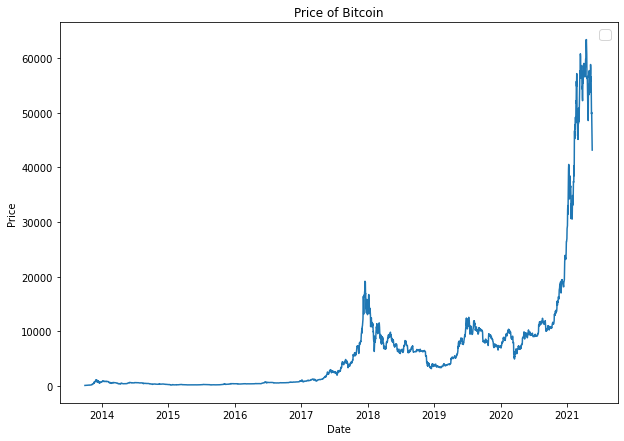

In [6]:
plt.figure(figsize=(10,7))
sns.lineplot(x=bitcoin_prices.index, y=bitcoin_prices["Price"], legend=True)
plt.title("Price of Bitcoin")
plt.legend(fontsize=14)

## Reading data with CSV modules

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader( f, delimiter = ",")
  next(csv_reader) #skip first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) 
    btc_price.append(float(line[2]))

In [8]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

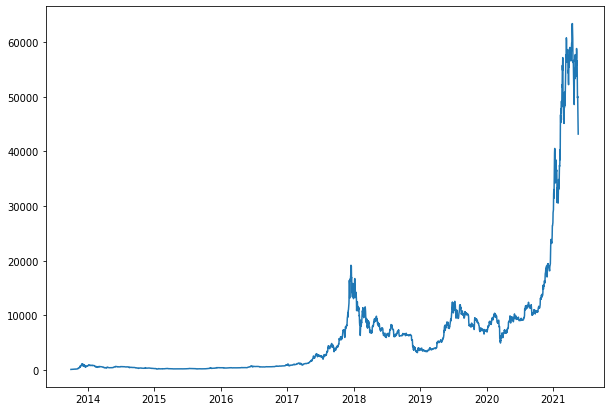

In [9]:
plt.figure(figsize=(10,7))
sns.lineplot(x=timesteps, y=btc_price)

## Create train & test set

In [10]:
split_size = int(0.8*len(btc_price)) # 80% train / 20% test
split_size

2229

In [11]:
X_train, y_train = timesteps[:split_size], btc_price[:split_size]
X_test, y_test = timesteps[split_size:], btc_price[split_size:]

len(X_train), len(X_test)

(2229, 558)

Text(0, 0.5, 'BTC Prices')

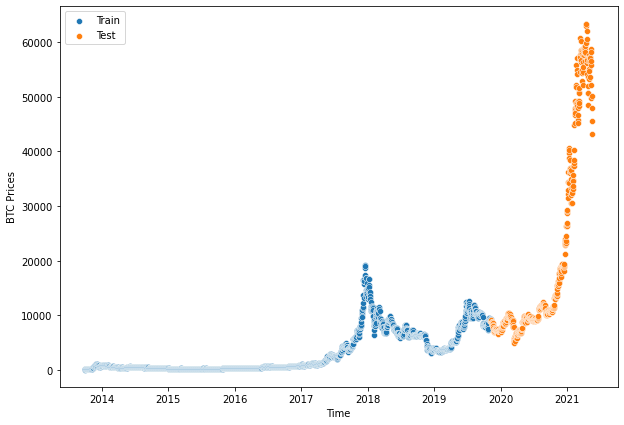

In [12]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_train,y=y_train, label="Train")
sns.scatterplot(x=X_test,y=y_test, label="Test")
plt.xlabel("Time")
plt.ylabel("BTC Prices")

## Naive Model

In [13]:
naive_forecast =y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

Text(0, 0.5, 'BTC Prices')

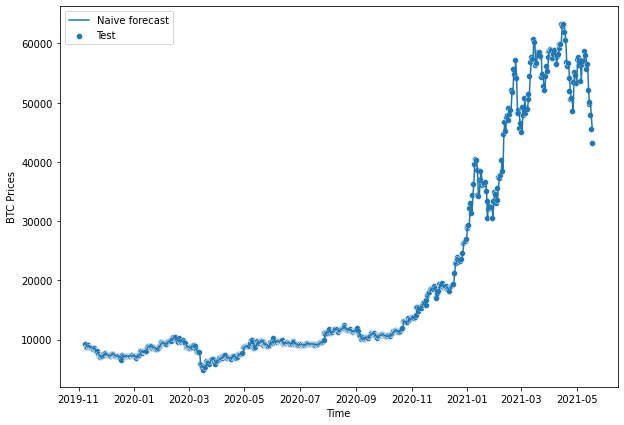

In [14]:
plt.figure(figsize=(10,7))
# sns.scatterplot(x=X_train,y=y_train, label="Train")
sns.scatterplot(x=X_test,y=y_test, label="Test")
sns.lineplot(x=X_test[1:], y=naive_forecast , label="Naive forecast")
plt.xlabel("Time")
plt.ylabel("BTC Prices")

In [15]:
## Evaluating a time series

In [16]:
import tensorflow as tf

In [17]:
import numpy as np
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):

  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find the MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Our seasonlaity is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182626

In [19]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  rmse = tf.sqrt(mse)

  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}





In [20]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [21]:
tf.reduce_mean(y_test).numpy(), tf.reduce_max(y_test).numpy()

(20056.633, 63346.79)

## Format data - Windowing data

In [22]:
# Window size = 7, Horizon = 1
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [23]:
btc_price[:8]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033]

In [24]:
HORIZON = 1
WINDOW_SIZE = 7

In [25]:
def get_labelled_window(x, horizon=HORIZON):

  return x[: , :-horizon], x[:, -horizon:]


In [26]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))

test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [27]:
tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [28]:
type(btc_price)

list

### Using numpy array indexing for creating Horizon & Window -  faster than Python for loops

In [29]:
def make_windows(x, window_size=WINDOW_SIZE, horizon= HORIZON):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon - 1)  ), axis=0).T

  # print(f"Window index:\n {window_indexes, window_indexes.shape}")

  x = np.array(x)

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_window(windowed_array, horizon=HORIZON)


  return windows, labels

In [30]:
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows) , len(full_labels)

(2780, 2780)

In [31]:
full_windows[:3], full_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ]]), array([[123.033  ],
        [124.049  ],
        [125.96116]]))

In [32]:
# tf.keras.preprocessing.timeseries_dataset_from_array()

## Splitting window data in training & test

In [33]:
def make_train_test_splits(windows, labels, test_split = 0.2):

  split_size = int(len(windows) * (1-test_split) )

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels


In [34]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows),  len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [35]:
train_labels.shape

(2224, 1)

In [36]:
np.squeeze(train_labels).shape

(2224,)

## Make a modelling checkpoint callback

In [37]:
import os

# Create a function to implement a ModelCheckpoint callback


def create_model_checkpoint(model_name, save_path="model_experiment"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

## Model 1

In [38]:
# Dense Model -  Window = 7, Horizon = 1
from tensorflow.keras import layers
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
   layers.Dense(128, activation="relu"),
   layers.Dense(HORIZON, activation="linear")                                                          
], name = "model_1_dense")


# Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])
# Fit

history_model_1 = model_1.fit(x=train_windows, 
                              y=train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data = (test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 780.3469 - mae: 780.3469 - mse: 2312739.0000 - val_loss: 2279.5828 - val_mae: 2279.5828 - val_mse: 12772095.0000
INFO:tensorflow:Assets written to: model_experiment/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 247.6765 - mae: 247.6765 - mse: 285480.9375 - val_loss: 1005.9864 - val_mae: 1005.9864 - val_mse: 3441759.2500
INFO:tensorflow:Assets written to: model_experiment/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 188.4107 - mae: 188.4107 - mse: 171890.0312 - val_loss: 923.2859 - val_mae: 923.2859 - val_mse: 2868195.0000
INFO:tensorflow:Assets written to: model_experiment/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 169.4334 - mae: 169.4334 - mse: 151699.4375 - val_loss: 900.5932 - val_mae: 900.5932 - val_mse: 2683713.7500
INFO:tensorflow:Assets written to: model_exper

In [39]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 662.5322 - mae: 662.5322 - mse: 1358192.1250


[662.5322265625, 662.5322265625, 1358192.125]

In [40]:
model_1 = tf.keras.models.load_model("/content/model_experiment/model_1_dense")

model_1.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 1ms/step - loss: 568.5499 - mae: 568.5499 - mse: 1172587.7500


[568.5498657226562, 568.5498657226562, 1172587.75]

In [41]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Making forecast function

In [42]:
def make_preds(model, input_data):
  """
  Uses model to make prediction on input data
  """

  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [43]:
## Make predictions using model 1 
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.835,
       8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>

In [44]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

In [45]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

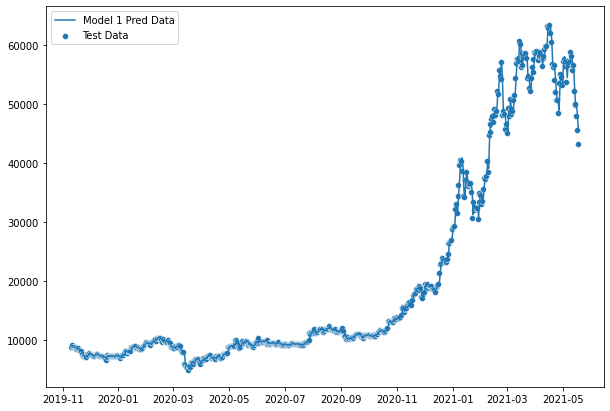

In [46]:
offset = 300
plt.figure(figsize=(10,7))
sns.scatterplot(x = X_test[-len(test_windows):], y = test_labels[:, 0],  label="Test Data")

sns.lineplot(x = X_test[-len(test_windows):], y = model_1_preds,  label="Model 1 Pred Data")

In [47]:

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

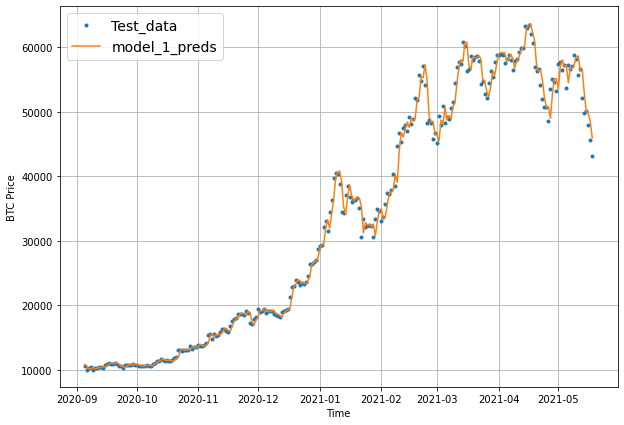

In [48]:

offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2

In [49]:
## Window size = 30, Horizon = 1

HORIZON = 1
WINDOW_SIZE = 30 

full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows),  len(train_labels), len(test_labels)


(2205, 552, 2205, 552)

In [50]:
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data = (test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment

In [51]:
model_2 = tf.keras.models.load_model("/content/model_experiment/model_2_dense")

model_2_preds = make_preds(model_2,test_windows )

model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)

model_2_results

{'mae': 608.8481,
 'mape': 2.7680666,
 'mase': 1.0642723,
 'mse': 1284314.4,
 'rmse': 1133.276}

In [52]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

## Model 3 

In [53]:
# windows = 30, horizon = 7

HORIZON = 7
WINDOW_SIZE = 30 

full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows),  len(train_labels), len(test_labels)


(2200, 551, 2200, 551)

In [54]:
tf.random.set_seed(42)

# Create Model
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data = (test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment

In [55]:
model_3 = tf.keras.models.load_model("/content/model_experiment/model_3_dense")

model_3_preds = make_preds(model_3, test_windows)

model_3_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_3_preds))

model_3_results

{'mae': array([  559.42004 ,   276.0053  ,   298.20258 ,   408.06152 ,
          431.32047 ,   526.28064 ,   542.41644 ,   459.79108 ,
          490.63736 ,   631.6582  ,   802.51654 ,   731.79333 ,
          684.06476 ,   789.71857 ,   563.4593  ,   271.9013  ,
          231.86858 ,   258.64767 ,   277.65277 ,   291.5478  ,
          105.425575,   132.63156 ,   205.97643 ,   262.20816 ,
          169.8651  ,   165.05127 ,   110.21959 ,    83.64655 ,
          115.86182 ,   152.87025 ,   279.98862 ,   380.96127 ,
          280.21414 ,   271.9101  ,   264.43088 ,   261.91315 ,
          330.29108 ,   242.21861 ,   253.72746 ,   245.38596 ,
          412.562   ,   128.63539 ,    88.56452 ,    92.15639 ,
          100.39704 ,   102.41455 ,    74.52804 ,    94.00349 ,
           84.86837 ,    76.64781 ,   108.49679 ,   144.869   ,
          187.69133 ,   162.5261  ,   265.83133 ,   391.21323 ,
          552.2943  ,   541.77313 ,   522.20886 ,   523.98157 ,
          430.13052 ,   276.80893

In [56]:
## Evaluate function for larger HORIZON
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  rmse = tf.sqrt(mse)

  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  mase = mean_absolute_scaled_error(y_true, y_pred)

  ## Account for different size matrix of linger

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase) 

  return {"mae": mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [57]:
model_3 = tf.keras.models.load_model("/content/model_experiment/model_3_dense")

model_3_preds = make_preds(model_3, test_windows)

model_3_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_3_preds))

model_3_results

{'mae': 1228.1416,
 'mape': 5.4698334,
 'mase': 2.1854093,
 'mse': 5323686.5,
 'rmse': 1412.9114}

In [58]:
model_2_results

{'mae': 608.8481,
 'mape': 2.7680666,
 'mase': 1.0642723,
 'mse': 1284314.4,
 'rmse': 1133.276}

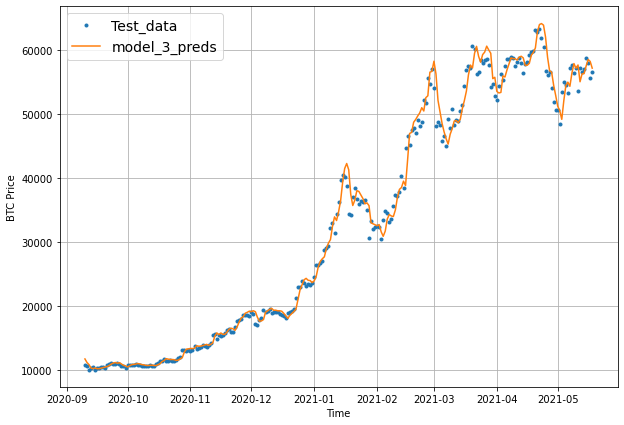

In [59]:

offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-" , start=offset,  label="model_3_preds")

### Model Comparisons 

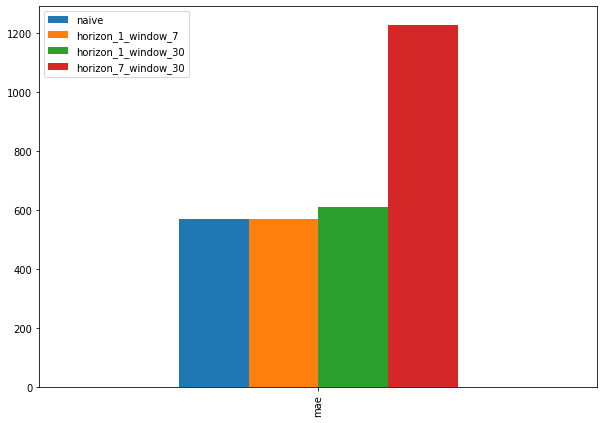

In [60]:
pd.DataFrame({"naive":naive_results["mae"],
              "horizon_1_window_7":model_1_results["mae"],
              "horizon_1_window_30":model_2_results["mae"],
              "horizon_7_window_30":model_3_results["mae"]}, index = ["mae"]).plot(figsize=(10, 7) , kind = "bar")

## Model 4 -  Conv 1D

In [61]:
HORIZON = 1
WINDOW_SIZE = 7 

full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows),  len(train_labels), len(test_labels)


(2224, 556, 2224, 556)

In [62]:
train_windows[0].shape

(7,)

In [63]:
x = tf.constant(train_windows[0])

expand_dims_layer = layers.Lambda( lambda x : tf.expand_dims(x, axis=1)) ## Add an extra dimension

print(x.shape ,expand_dims_layer(x).shape )

(7,) (7, 1)


In [64]:
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [65]:
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [66]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x , axis=1)),                                                             
  layers.Conv1D(filters=128, kernel_size=7, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")


model_4.compile(loss="MAE",
                optimizer="Adam")

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_conv1D/assets
INFO:tensorflow:Assets written to: mod

In [67]:
model_4 = tf.keras.models.load_model("/content/model_experiment/model_4_conv1D")

model_4_preds = make_preds(model_4, test_windows)

model_4_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_4_preds))

model_4_results

{'mae': 570.39935,
 'mape': 2.5455723,
 'mase': 1.0020337,
 'mse': 1182763.1,
 'rmse': 1087.5492}

## Model 5 - RNN

In [68]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

# compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 2323.6123 - val_loss: 9224.3506
INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 695.4956 - val_loss: 1485.8942
INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 237.3010 - val_loss: 1298.9435
INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 181.9182 - val_loss: 966.6407
INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 173.4021 - val_loss: 970.9384
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 172.3319 - val_loss: 891.5209
INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets
Epoch 7/100
18/18

In [69]:
model_5 = tf.keras.models.load_model("/content/model_experiment/model_5_LSTM")

model_5_preds = make_preds(model_5, test_windows)

model_5_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_5_preds))

model_5_results

{'mae': 591.6655,
 'mape': 2.66558,
 'mase': 1.0393925,
 'mse': 1250831.6,
 'rmse': 1118.4059}

In [70]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

## Make a multivariate time series model

In [71]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [72]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2414)

In [73]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2 
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [74]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [75]:
bitcoin_prices_block.iloc[1500:2000]

,Price,block_reward
Date,,
2017-11-09,7342.823750,12.5
2017-11-10,7250.770000,12.5
2017-11-11,6773.695000,12.5
2017-11-12,6075.301250,12.5
2017-11-13,5969.130000,12.5
...,...,...
2019-03-19,3974.415764,12.5
2019-03-20,3996.037131,12.5
2019-03-21,4027.787395,12.5


In [76]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


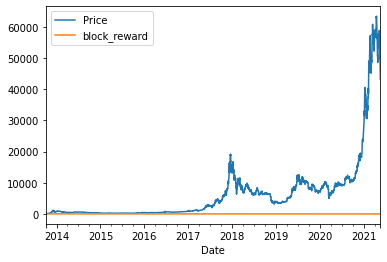

In [77]:
bitcoin_prices_block.plot()

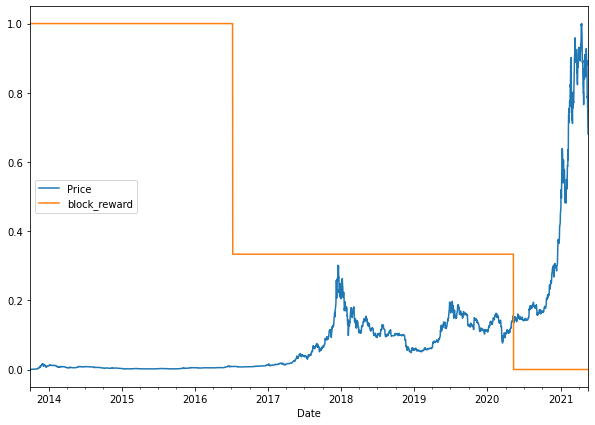

In [78]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]), columns = bitcoin_prices_block.columns, index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windows dataset with Pandas 

In [79]:
HORIZON = 1
WINDOW_SIZE = 7 

bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

# bitcoin_prices_windowed.fillna(0, inplace=True)

In [80]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [81]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [82]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [83]:
## make train & test sets

split_size = int(len(X)*0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

X_train.shape, y_train.shape , X_test.shape, y_test.shape

((2224, 8), (2224,), (556, 8), (556,))

## Model 6: Dense(multivariate time series)

In [84]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer="Adam")

model_6.fit(X_train,
            y_train,
            epochs=100,
            validation_data=(X_test,y_test),
            batch_size=128,
            verbose=1,
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 1234.6880 - val_loss: 2061.8193
INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 351.5003 - val_loss: 1908.7338
INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 235.4110 - val_loss: 1329.5337
INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 208.6456 - val_loss: 1102.0098
INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 196.5595 - val_loss: 1108.6184
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 187.2317 - val_loss: 1035.9945
INFO:tensorflow:Assets written 

In [85]:
model_6 = tf.keras.models.load_model("/content/model_experiment/model_6_dense_multivariate")

model_6_preds = make_preds(model_6, X_test)

model_6_results = evaluate_preds(tf.squeeze(y_test), tf.squeeze(model_6_preds))

model_6_results

{'mae': 568.33545,
 'mape': 2.5493133,
 'mase': 0.99840796,
 'mse': 1164860.0,
 'rmse': 1079.2867}

In [86]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

## Building & testing the N-BEATS block layer

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size: int,
               horizon: in,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    slef.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range ]

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")